# Coursework 2 - Mathematics for Machine Learning

## Due: 12/12/2025

## CID: 02232170

***
***

## Exercise 1: Approximation theory

### Exercise 1.1

#### Question 1:

$$ f(x) = A_2\sigma(A_1x + b_1)$$
Noting some important details: $x$ is of size d and non-negative ($ \in [0,1]^d$) and the width of each layer is required to be $d+3$.  We want $w$ ReLU layers which is the same number of rows as $A_1$ and columns as $A_2$. We will rename A1 to $A^{(1)}$  A2 to $A^{(2)}$ and b1 as $b^{(1)}$ to denote the layer they belong to and reference their rows and columns easily.
$$
   [\sigma(A^{(1)}x + b^{(1)})]_i = \sigma(\sum_{j = 1}^d A_{i, j}^{(1)}x + b_i^{(1)}) \tag{ ith element after activation}
$$
We can rewrite f as: $\sum_{i = 1}^w A_i^{(2)}[\sigma(A^{(1)}x + b^{(1)})]_i$.

<br> The new network we will construct will separate each of the rows of $A^{(1)}$ into w hidden layers, and use $ReLU$ as the activation function. what we need to do <br>
1. Preserve x across all layers(of width d) so that we can apply each row of $A^{(1)}$ independently <br>
2. compute $sigma(A^{(1)}x + b^{(1)})$ across w hidden and ReLU layers (of width 1) <br>
3. store the sum of positive and negative values from previous layers (of width 1 each). We do this because $ReLU$ will be applied on our new layers and only outputs non-negative values, so we need to keep track of positive and negative contributions separately. Note that $x \in [0,1]^d$ so we dont need to worry about $ReLU$ erasing any values from x. <br>
4. The final layer will subtract the negative sum from the positive sum. <br>
Dimensionally, we have d+3 nodes per layer, which meets the requirement. <br>

Let's define the layers: <br>
- $W^{(1)}$ : First layer weights of size (d+3) x d 
$$
   W^{(1)} = \begin{bmatrix}
   I \\
   A_1^{(1)} \\
    \bold{0} \\
    \bold{0} 
   \end{bmatrix}
$$
Where I is the identity matrix of size d x d,  $\bold{0}$ are zero vectors of size 1 x d, $A_1^{(1)}$ is the first row of $A^{(1)}$. <br> We will denote our new bias vector as $c^{(i)}$ for layer i. 
$$
c^{(1)} = \begin{bmatrix}
   \bold{0} \\
   b_1^{(1)} \\
    0 \\
    0 
\end{bmatrix}
$$
Thus post-activation we have the following calculations:
$$
\sigma(W^{(1)}x + c^{(1)}) = \begin{bmatrix}
   x \\
   \sigma(A_1^{(1)}x + b_1^{(1)}) \\
    0 \\
    0
\end{bmatrix}
$$
- For layer 2 to w we get the following input, Weight and bias: <br>
$$

    W^{(i)} = \begin{bmatrix}
    I & 0 & 0 & 0\\
    A_i^{(1)} & 0 & 0 & 0 \\
    \bold{0} & \sigma(A_{i-1}^{(2)}) & 1 & 0 \\
    \bold{0} & \sigma(-A_{i-1}^{(2)}) & 0 & 1
    \end{bmatrix}
$$
$$
x' = \begin{bmatrix}
    x \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of positive contributions from previous layers} \\
    \text{Sum of negative contributions from previous layers}
    \end{bmatrix}
    \;
c^{(i)} = \begin{bmatrix}
    \bold{0} \\
    b_i^{(1)} \\
    0 \\
    0 
    \end{bmatrix}
$$ 
Note that in all our $c^{(i)}$ vectors, $\bold{0}$ is a zero vector of size d x 1. <br>
Explanation of the weight matrix: <br>
- First d rows preserve x  due to Identity matrix<br>
- (d+1)th row computes $A_i^{(1)}x + b_i^{(1)}$ <br>
- (d+2)th row adds the positive contribution from this layer(if any) to the sum of positive contributions from previous layers <br>
- (d+3)th row adds the negative contribution from this layer(if any) to the sum of negative contributions from previous layers <br> 
I have used $\sigma(A_{i-1}^{(2)})$ to denote whether the output from the previous layer was positive or negative, which determines whether we add to the positive or negative sum. But, if we were to construct it in reality, we would put a zero on row d+2 if $A_{i-1}^{(2)}$ is negative itself otherwise. Likewise for row d+3. This makes it so that the negative and positive contributions are stored as positive values and 0 is added to the layers. We have $I_2$ in the bottom right of W^(i) so that we sum the previously gained contributions to the new contribution. <br><br>

To make it more clear we will write the output of 1 layer depending on the sign of $A_{i-1}^{(2)}$: <br>

If $A_{i-1}^{(2)}$ is positive: <br>
$$
    \implies \begin{bmatrix}
    x \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of positive contributions from previous layers} + \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of negative contributions from previous layers}
    \end{bmatrix}
$$
If $A_{i-1}^{(2)}$ is negative: <br>
$$
    \implies \begin{bmatrix}
    x \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of positive contributions from previous layers} \\
    \text{Sum of negative contributions from previous layers} + \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)})
    \end{bmatrix}
$$

- Finally for the output layer we have: <br>
$$
    W^{output} = \begin{bmatrix} 0_{1 \times d} & A^{(2)}_w & -1 & 1 \end{bmatrix}
$$
such that when applying to the output of the wth hidden layer we get the calculation:
$$
\begin{bmatrix} 0_{1 \times d} & A^{(2)}_w & -1 & 1 \end{bmatrix} \times
\begin{bmatrix} x \\ \sigma(A_{w}^{(1)}x + b_{w}^{(1)}) \\ 
\sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}>0} \\
\sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}<0}
\end{bmatrix} \\


 = A^{(2)}_w \sigma(A_{w}^{(1)}x + b_{w}^{(1)}) + 
 \sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}>0} 
 - \sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}<0} 
 = A^{(2)}_w \sigma(A_{w}^{(1)}x + b_{w}^{(1)}) + 
 \sum_{j=1}^{w-1} A_{j}^{(2)} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})  \\
 = \sum_{i = 1}^w A_i^{(2)}[\sigma(A^{(1)}x + b^{(1)})]_i = f(x)
$$
Therefore, we define $N(x)$ as the following:
$$
N(x) = W^{output} \sigma(W^{(w)} \sigma(W^{(w-1)} ... \sigma(W^{(1)}x + c^{(1)}) ... + c^{(w-1)}) + c^{(w)}) 
$$ 
and have proved that $$ N(x) = f(x) \; \forall x \in [0,1]^d$$


#### Question 2:

Enter your answer here
In our previous answer, we assumed that $ x \in [0,1]^d$. However, if we relax this assumption and allow $x$ to be in $[-1,1]^d$. One way to handle this is to introduce d extra rows in W and c, $W \in R^{(2d + 3)\times d}$ and $c \in R^{2d + 3}$. We will use it to store $ -x$ alongside x in the first layer.
Our new Matrices and vectors will look like this:
$$
    W^{(1)} = \begin{bmatrix}
    I \\
    -I \\
    A_1^{(1)} \\
     \bold{0} \\
     \bold{0} 
    \end{bmatrix}
$$
where, I is the identity matrix of size d x d,  $\bold{0}$ are zero vectors of size 1 x d, $A_1^{(1)}$ is the first row of $A^{(1)}$. <br> We will denote our new bias vector as $c^{(i)}$ for layer i.
$$
c^{(1)} = \begin{bmatrix}
    \bold{0} \\
    \bold{0} \\
    b_1^{(1)} \\
     0 \\
     0 
\end{bmatrix}
$$
Where $\bold{0}$ is a zero vector of size d x 1. <br>
For $i >1$ we have:
$$
    W^{(i)} = \begin{bmatrix}
    I & \bold{0} & 0 & 0 & 0\\
    \bold{0} & -I & 0 & 0 & 0\\
    A_i^{(1)} & -A_i^{(1)} & 0 & 0 & 0 \\
    \bold{0} & \bold{0} & \sigma(A_{i-1}^{(2)}) & 1 & 0 \\
    \bold{0} & \bold{0} & \sigma(-A_{i-1}^{(2)}) & 0 & 1
    \end{bmatrix}
$$

Finally for the output layer we have: <br>
$$ 
    W^{output} = \begin{bmatrix} 0_{1 \times d} & 0_{1 \times d} & A^{(2)}_w & 1 & -1 \end{bmatrix}
$$
Example Output of hidden layer:
$$
\begin{bmatrix}
    \sigma(x) \\
    \sigma(-x) \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \sum \sigma(A^{(1)}_j x + b_j^{(1)}) * 1_{A_j^{(2)}>0} \\
    \sum \sigma(A^{(1)}_j x + b_j^{(1)}) * 1_{A_j^{(2)}<0}
\end{bmatrix}
$$

***
### Exercise 1.2

#### Question 1:

We can begin by using the hint.
$$
h(x) = \lim_{\delta \to 0} \frac{f((w+\delta)x) - f(wx)}{\delta}
$$
Let's define $g_\delta(x) = \frac{f((w+\delta)x) - f(wx)}{\delta}$ which is $\in \mathcal{F}_{\sigma, 1} $ since $\mathcal{F}_{\sigma, 1}$ is closed under addition and scalar multiplication from the question.
Using the Taylor expansion of $f$ about $wx$ we have:
$$
f((w+\delta)x) = f(wx) + \delta x f'(wx) + \frac{\delta^2 x^2}{2} f''(z)
$$
for some $z$ between $wx$ and $(w+\delta)x$. Thus we have:
$$
g_\delta(x) = \frac{f((w+\delta)x) - f(wx)}{\delta} \\ =  \frac{f(wx) + \delta x f'(wx) + \frac{\delta^2 x^2}{2} f''(z) - f(wx)}{\delta} \\ =  x f'(wx) + \frac{\delta x^2}{2} f''(z) = h(sx) + \frac{\delta x^2}{2} f''(z)
$$

So,
$$
|| h - g_\delta ||_u = \sup_{x \in [0,1]} |h(x) - g_\delta(x)| \\
= \sup_{x \in [0,1]} | \frac{\delta x^2}{2} f''(z) | \leq \frac{\delta}{2} \sup_{x \in [0,1]} |z^2 f''(z)| \\
\leq \frac{\delta}{2} \sup_{x \in [0,1]} | f''(z)|
$$
I used that $x \in [0,1]$. We know that $z \in [wx, (w + \delta)x]$ and consider 2 cases of w: w >= 0 means that $z in [0, w + \delta]$ else if w < 0 then $z \in [w, 0]$ which means $|z| \leq |w| + \delta$. 

let's work out the second derivative of f and plug it into our current bound:
$$
f(x) = \sum_{i=1}^m a_i \sigma(W_i x + b_i) \\
f'(x) = \sum_{i=1}^m a_i W_i \sigma'(W_i x + b_i) \\
f''(x) = \sum_{i=1}^m a_i W_i^2 \sigma''(W_i x + b_i) \\
\implies || h - g_\delta ||_u  \leq \frac{\delta}{2} \sup_{|z| \leq |w| + \delta} | f''(z)| = \frac{\delta}{2} \sup_{|z| \leq |w| + \delta} | \sum_{i=1}^m a_i W_i^2 \sigma''(W_i z + b_i) | \\
\leq \frac{\delta}{2}  \sum_{i=1}^m |a_i| *W_i^2 * |\sup_{|z| \leq |w| + \delta} \sigma''(W_i z + b_i) |
$$
Where we use the fact that the supremum of a sum is less than the sum of supremums. Now we can use the fact that 
$ \sigma \in C^\infty \implies \sup_{|z| \leq |w| + \delta} \sigma''(W_i z + b_i) < M_i $ with which we define $M = \sum_{i = 1}^m W_i^2 |a_i| M_i$ <br>

Thus we have:
$$
    || h - g_\delta ||_u  \leq \frac{\delta}{2}  \sum_{i=1}^m |a_i| *W_i^2 * M_i \leq \frac{\delta}{2} M
$$

To conclude, given any $\epsilon > 0, \exists g_\delta \in \mathcal{F}_{\sigma, 1} $ such that $|| h - g_\delta ||_u < \epsilon$ by choosing $\delta = \frac{2 \epsilon}{M}$.

#### Question 2:

Suppose we have $w, b, \epsilon$ as defined in the question, then the base case(n=1) is satisfied from question 1 since we have shown that $h_{1,w,b}(x) = \frac{d}{dw}  f(wx) $ has a g as previously shown. <br>

Assume that for some k>=1, $\exists g_{k,w,b,\epsilon} \in \mathcal{F}_{\sigma, 1} $ such that $ \| h_{k, w, b} - g_{k, w, b, \epsilon} \|_u < \epsilon $ <br>

Now, lets consider the case for k + 1:

$$
\begin{align*}
h_{k+1, w, b}(x) &= \frac{d}{dw} (x^k \sigma^{(k)}(wx + b)) \\
&= \lim_{\delta \rightarrow 0} \frac{x^k \sigma^{(k)}((w + \delta)x + b) - x^k \sigma^{(k)}(wx + b)}{\delta} \\
&= \lim_{\delta \rightarrow 0} \frac{1}{\delta} ( h_{k, w+\delta,b}(x) - h_{k, w,b}(x) )
\end{align*}
$$

I claim that we can choose $g_{k+1, w, b, \epsilon} = \frac{1}{\delta}( g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} - g_{k, w, b, \frac{\epsilon\delta}{4}} ) $. From our inductive hypothesis we have, we chose the functions above such that 
$\| h_{k, w + \delta, b} - g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} \|_u < \frac{\epsilon\delta}{4}$ and $\| h_{k, w, b} - g_{k, w, b, \epsilon} \|_u < \frac{\epsilon\delta}{4}$. For some $\delta > 0$ to be determined later. Note that $g_{k+1, w, b, \epsilon} \in \mathcal{F}_{\sigma, 1} $ since $\mathcal{F}_{\sigma, 1} $ is closed under addition and scalar multiplication. 

Regarding the bound, we have the following proof:
$$
\begin{align*}
\| h_{k+1, w, b} - g_{k+1, w, b, \epsilon} \|_u &=  || h_{k+1,w,b} - \frac{1}{\delta}( g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} - g_{k, w, b, \frac{\epsilon\delta}{4}} ) || \\
&= || h_{k +1, w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) + \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) -  \frac{1}{\delta}( g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} - g_{k, w, b, \frac{\epsilon\delta}{4}}) ||_u \\
&\leq || H_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u 
+ \frac{1}{\delta} || h_{k,w+\delta,b} - g_{k,w+\delta,b,\frac{\epsilon\delta}{4}} ||_u
+ \frac{1}{\delta} || h_{k,w,b} - g_{k,w,b,\frac{\epsilon\delta}{4}} ||_u \\
&< || h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u + \frac{1}{\delta}\frac{\epsilon\delta}{4} + \frac{1}{\delta}\frac{\epsilon\delta}{4} \\
&= || h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u + \frac{\epsilon}{2}



\end{align*}
$$
In line 3, I used the triangle inequality. in line 4, I used the bound that we found in part 1 of this question. To bound the first term, we can use the Taylor series expansion again:
$$
\begin{align*}
    \frac{1}{\delta} (h_{k, w+\delta,b} - h_{k, w,b})  &= \frac{1}{\delta} ( x^k \sigma^{(k)}((w + \delta)x + b) - x^k \sigma^{(k)}(wx + b) ) 
\end{align*}
$$
Expanding $\sigma^{(k)}((w + \delta)x + b)$ using Taylor series:
$$
\sigma^{(k)}((w + \delta)x + b) = \sigma^{(k)}(wx + b) + \delta x \sigma^{(k+1)}(wx + b) + \frac{\delta^2 x^2}{2} \sigma^{(k+2)}(wz + b)
$$
Substituting this back we have:
$$
\frac{x^k}{\delta} (\sigma^{(k)}(wx + b) + {\sigma^{(k + 1)}(wx + b) \delta x} + {\sigma^{(k + 2)}(wz + b) \frac{(\delta x)^2}{2}}- \sigma^{(k)}(wx + b)) \\
= x^{k+1} \sigma^{(k + 1)}(wx + b) + \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b) = h_{k+1,w,b}(x) + \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b)
$$
And, substituting this back into the bound:
$$
\begin{align*}
&|| h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u \\
&= || h_{k+1,w,b} - h_{k+1,w,b} - \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b) ||_u   \\ &= || - \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b) ||_u  \\ 
&= \frac{\delta}{2} \sup_{x \in [0,1]} | x^{k+2} \sigma^{(k + 2)}(wz + b) | \leq \frac{\delta}{2} \sup_{x \in [0,1]} | \sigma^{(k + 2)}(wz + b) | \\
&\leq \frac{\delta}{2} M_{k+2} < \frac{\epsilon}{2} \quad \text{lets choose } \delta < min (\frac{\epsilon}{M_{k+2}}, 1)
\end{align*}
$$
I used that $x \in [0,1]$ in line 4, and the fact that $\sigma \in C^\infty$ in line 5 to define $M_{k+2}$ from the definition in the question. <br>
Finally lets put it back into the main bound
$$
\| h_{k+1, w, b} - g_{k+1, w, b, \epsilon} \|_u \leq || h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u + \frac{\epsilon}{2} < \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon
$$
Thus by induction, we have shown that $\forall n \in \mathbb{N}, \exists g_{n,w,b,\epsilon} \in \mathcal{F}_{\sigma, 1} $ such that $ \| h_{n, w, b} - g_{n, w, b, \epsilon} \|_u < \epsilon $.>


#### Question 3:

From the previous part, we showed that given, $h_{n,w,b}(x) = x^n \sigma^{(n)}(wx + b), \forall \epsilon >0, \exists g_{n,w,b,\epsilon}, ||h_{n,w,b} -  g_{n,w,b,\epsilon}||_u < \epsilon$. If we set w=0, then $h_{n,0,b}(x) = x^n \sigma^{(n)}(b) = p_n(x) \sigma^{(n)}(b)$.
We can define a different function $$g'_{n,0,b,\epsilon} = \frac{g_{n,w,b,\epsilon}}{\sigma^{(n)}(b)}$$. we know that g' is in $\mathcal{F}_{\sigma,1} $ because $\mathcal{F}_{\sigma,1} $ is closed under scalar multiplication.
Now we can compute the bound with $\epsilon' = \epsilon |\sigma^{(n)}(b)|$:
$$
|| p_n - g'_{n,0,b,\epsilon'}||_u = \frac{1}{|\sigma^{(n)}(b)|} || h_{n,0,b} - g_{n,0,b,\epsilon'} ||_u < \frac{\epsilon'}{|\sigma^{(n)}(b)|} = \epsilon
$$
where we used that $h_n,0,b = p_n(x) \sigma^{(n)}(b) $ and $ ||h_{n,0,b} - g_{n,0,b,\epsilon'}||_u < \epsilon'$ from the previous part.

For the proof to be complete we need it to be that for all n, $\sigma^{(n)}(b) \neq 0$ for some b. Now we know that  $\sigma$ is not a polynomial, which means that there cannot be a derivative of $sigma$ that is 0 everywhere. To see this, suppose there is a k such that $\sigma^{(k)}(x) = 0$, then intergrating k times would mean that $\sigma$ is a polynomial of degree at most k-1, which is a contradiction. Thus for all n, there exists some b such that $\sigma^{(n)}(b) \neq 0$. Concluding the proof, we are allowed to divide by $\sigma^{(n)}(b)$ in the earlier steps.

#### Question 4:

Our previous part used that x is in [0,1], we would like to extends this to [-r,r] for any r > 0. Suppose we define $y = 2rx - r$ then $x \in [0,1] \iff y \in [-r,r]$.
Then p_n(y) can be written as:
$$
(2rx -r)^n = \sum_{k=0}^n \binom{n}{k} (2rx)^k (-r)^{n-k} = \sum_{k=0}^n \binom{n}{k} (2r)^k (-r)^{n-k} x^k \\ = \sum_{k=0}^n \binom{n}{k} (2r)^k (-r)^{n-k} p_k(x) =  \sum_{k=0}^n c_k p_k(x)
$$
where $c_k = \binom{n}{k} (2r)^k (-r)^{n-k}$. From part 3, we know that p_k(x) has an approximation in $\mathcal{F}_{\sigma,1}$ and we can call it $a_{k,\delta}$. Let's define a function $$A_n(y) = \sum_{k=0}^n c_k a_{k,\delta}(\frac{y +r}{2r}) = \sum_{k=0}^n c_k a_{k,\delta}(x)$$
That uses the approximations of $p_k(x)$ and the coefficients from $p_n(y). Note that $A_n(y) \in \mathcal{F}_{\sigma,1}$ since it is a linear combination of functions in $\mathcal{F}_{\sigma,1}$. Let's fix $\epsilon>0 $ and choose $\delta= \frac{\epsilon}{\sum_{k=0}^n |c_k|}$ then we have the following bound:
$$
|| p_n(y) - A_n(y) ||_u = || \sum_{k=0}^n c_k p_k(x) - \sum_{k=0}^n c_k a_{k,\delta}(x) ||_u = || \sum_{k=0}^n c_k (p_k(x) - a_{k,\delta}(x)) ||_u \\
\leq \sum_{k=0}^n |c_k| || p_k(x) - a_{k,\delta}(x) ||_u < \sum_{k=0}^n |c_k| \delta = \epsilon
$$
Where I used the triangle inequality in line 3. Thus we have shown that we can find an approximation for $p_n(y)$ on the interval [-r,r] using functions from $\mathcal{F}_{\sigma,1}$.
<br>
Coming back to the question, we want to find an approximation for exp(x) on the interval [-r,r] and can do so using the Taylor series:
$$
exp(x) = \sum_{k=0}^\infty \frac{x^k}{k!} = \sum_{k=0}^n \frac{x^k}{k!} + R_n(x) \\
R_n(x) = \frac{exp(z) x^{n+1}}{(n+1)!} \text{ for some z between 0 and x}
$$

So we know that $p_k(x) = x^k$ has an approximation in $\mathcal{F}_{\sigma,1}$ and will call it $a_{k,\delta}$ and set $\delta = \frac{\epsilon}{2 \sum_{k=0}^n \frac{1}{k!}}$. Let's define a new function E and show that it approximates exp(x).
$$
E_n(x) = \sum_{k=0}^n \frac{a_{k,\delta}(x)}{k!}
$$

Now lets bound the error:

$$
\begin{align*}
\sup_{|x| \leq r} | exp(x) - E_n(x) | &= \sup_{|x| \leq r} | \sum_{k=0}^n \frac{x^k}{k!} + R_n(x) - \sum_{k=0}^n \frac{a_{k,\delta}(x)}{k!} | \\
&= \sup_{|x| \leq r} | R_n(x) + \sum_{k=0}^n \frac{x^k - a_{k,\delta}(x)}{k!} | \\
&\leq \sup_{|x| \leq r} | R_n(x) | + \sup_{|x| \leq r} | \sum_{k=0}^n \frac{x^k - a_{k,\delta}(x)}{k!} | \\
&\leq \sup_{|x| \leq r} | R_n(x) | + \sum_{k=0}^n \frac{1}{k!} \sup_{|x| \leq r} | x^k - a_{k,\delta}(x) | \\
&< \sup_{|x| \leq r} |R_n(x)| + \sum_{k=0} \frac{1}{k!} \delta = \sup_{|x| \leq r} |R_n(x)| + \frac{\epsilon}{2}

\end{align*}
$$
Here I used the triangle inequality in line 3 and the fact that supremum of a sum is less than the sum of supremums in line 4. <br>
Now we can bound the two terms separately.
$R_n(x) = \frac{exp(z) x^{n+1}}{(n+1)!} \rightarrow 0$ as $n \rightarrow \infty$. Hence, for sufficiently large n, $R_n(x) < \frac{\epsilon}{2}$. <br>

Finally, we have:
$$
\sup_{|x| \leq r} | exp(x) - E_n(x) | < \frac{\epsilon}{2} + \sum_{k=0}^n \frac{1}{k!} \delta = \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon
$$

#### Question 5:

The hint that $\mathcal{F}_{\exp,d}$  is a universeal approximator means that for all $\epsilon>0$ there is a function $E_{\epsilon} \in \mathcal{F}_{\exp,d}$ such that $ ||f - E_{\epsilon} ||_u < \epsilon$.



#### Question 6:

Enter your answer here

*** 
***

## Exercise 2: Implementation

### Part 1: Image classification


### Question 1
Enter your answer here

False
cpu


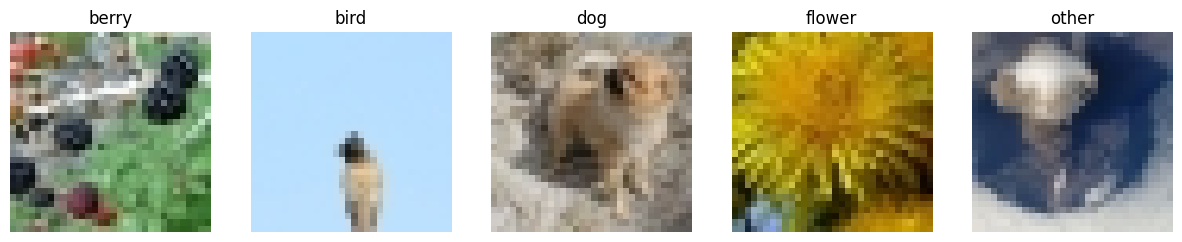

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# import torchinfo
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is working
# print(torch.cuda.get_device_name(0))  # Should print the name of your GPU (e.g., GTX 1060)


# Setting device so that code can run on GPU if available
device_name = "cpu"
if torch.cuda.is_available():
    device_name = "cuda:0"
elif torch.mps.is_available():
    device_name = "mps"
device = torch.device(device_name)
print(device.type)


# Will apply the following transformations to the images:
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

# We are Loading training and test datasets.
# Then, we apply the transformations on them. so that they are in the right format.
trainset = torchvision.datasets.ImageFolder(root='./dataset/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='./dataset/test', transform=transform)

# These dataloaders will help us to load the data in batches and iterate over them efficiently
# We can also choose to shuffle(whcih we do with the training data).
# num_workers means how many subprocesses to use for data loading. We set it to 2 here.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2) 
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = trainset.classes # this is how we get the class names

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, class_name in enumerate(classes):
    class_idx = trainset.class_to_idx[class_name]
    for img, label in trainset:
        if label == class_idx:
            img = img / 2 + 0.5  # unnormalize
            npimg = img.numpy()
            axes[i].imshow(np.transpose(npimg, (1, 2, 0)))
            axes[i].set_title(class_name)
            axes[i].axis('off')
            break
plt.show()

# The lines below combine transformations of turning an image into a tensor and normalising the tensor to
# have mean 0.5 and standard deviation 0.5 for each colour channel (Red, Green, Blue).
# This is useful to do before feeding the images into a neural network 
# becaause it imrpoves model convergence and helps iwth stability (i.e. no large gradient updates)
# transform = transforms . Compose (
#  [ transforms . ToTensor () ,
#  transforms . Normalize ((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5) ) ])

### Question 2

In [ ]:
class myCNN(nn.module):
    def __init__(self):
        super().__init_()
        # Define layers here
    def forward(self, x):
        ...
        return x

### Question 3

### Question 4

### Question 5

### Question 6

***

### Part 2: Fine tuning

### Question 1

### Question 2

### Question 3

### Question 4

### Question 5

***
### Part 3: Adversarial attacks

### Question 1

### Question 2

### Question 3

### Question 4

### Question 5